# Analysing Escalability

## Import data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

cols = ['cores', 'problem_size', 'timing']

df = pd.read_csv('times.csv', names=cols)

df.head()

,cores,problem_size,timing
0,1,16000000,2.100310
1,2,16000000,1.076701
2,4,16000000,0.643739
3,8,16000000,0.456383
4,16,16000000,0.380769


## Speedups and Efficiences

In [2]:
# Tempos seriais
serial_timings = df[df['cores'] == 1]

# Speedups and efficiences vector
speedups = []
efficiencies = []

for index, row in df.iterrows():
    # Get the serial time for this problem size
    t1 = serial_timings[serial_timings['problem_size'] == row['problem_size']]['timing'].values[0]

    # Get the parallel time
    tp = row['timing']

    # Get the number of cores
    p = row['cores']
    
    # Calc speedup and efficiency
    speedups.append(t1/tp)
    efficiencies.append(t1/(p*tp))

# Add to the dataframe
df['speedup'] = speedups
df['efficiency'] = efficiencies

## Heatmaps

In [3]:
"""
Plot heatmap by means of a DataFrame
"""
def plot_heatmap(df, x, y, z, axis, title):
    pivot = df.pivot(index=x,columns=y,values=z)
    sns.set()
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu", ax=axis)
    axis.set_title(title)
    axis.set_xlabel("Tamanho do problema")
    axis.set_ylabel("Processos")

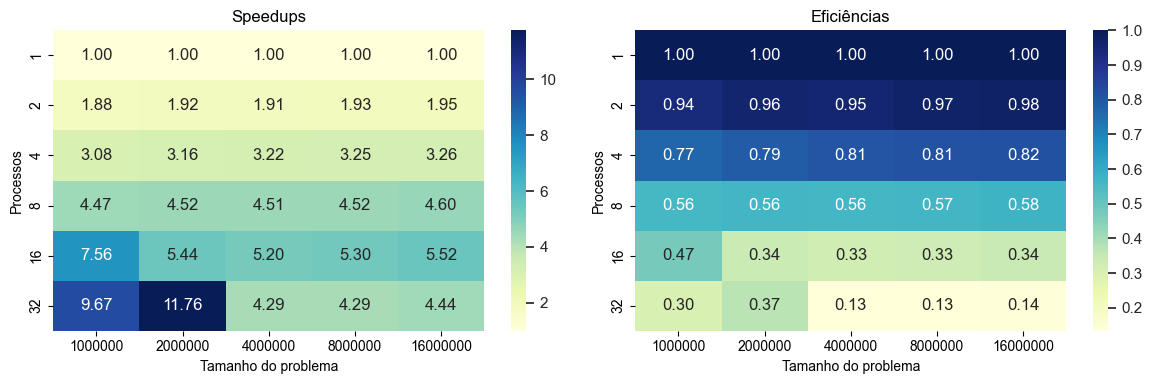

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_heatmap(df, 'cores', 'problem_size', 'speedup', axes[0], 'Speedups')
plot_heatmap(df, 'cores', 'problem_size', 'efficiency', axes[1], 'Eficiências')
plt.tight_layout()
plt.show()